In [1]:
import mne
import mne.io

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline

In [81]:
data_path = "/home/pfilipia/inria/chu_nice_inria/patients_ecog"
patient02_path_prefix = data_path + "/patient02/20180528_1212"

# events_data = pd.read_csv(
#     "%s_events.csv" % patient02_path_prefix, header=0
# )

raw = mne.io.read_raw_cnt(
    input_fname="%s_neuroscan.cnt" % patient02_path_prefix, montage=None
)

  Could not parse meas date from the header. Setting to None.


<ipython-input-81-46e7cb65b536>:9: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  input_fname="%s_neuroscan.cnt" % patient02_path_prefix, montage=None
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/channels/layout.py:737: RuntimeWarning: invalid value encountered in true_divide
  xs /= sqs  # Shape to a sphere and normalize
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/channels/layout.py:738: RuntimeWarning: invalid value encountered in true_divide
  ys /= sqs


In [82]:
# raw.info['bads'] = ['STI 014']
raw.load_data()
# raw.filter(l_freq=0.5, h_freq=1000)
# raw.notch_filter(freqs=50, notch_widths=9)


Reading 0 ... 1149525  =      0.000 ...   561.292 secs...


<RawCNT  |  20180528_1212_neuroscan.cnt, n_channels x n_times : 16 x 1149526 (561.3 sec), ~140.4 MB, data loaded>

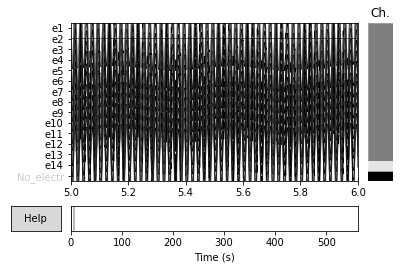

OK


In [83]:
# raw.plot(start=2, duration=1.00, n_channels=4, order=[0, 2, 3, 14], scalings={'eeg': 0.001})
raw.plot(start=5, duration=1.00, n_channels=15, scalings={'eeg': 0.001})
# raw.plot(start=t_start, duration=events_data.loc[stim_id]['time_interval'], n_channels=15, scalings={'eeg': 0.0001})

print("OK")

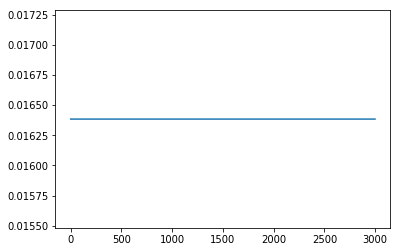

In [91]:
data = raw.get_data()
plt.plot(data[1, 3000:6000])
# plt.ylim([-0.005, 0.005])

(-0.005, 0.005)

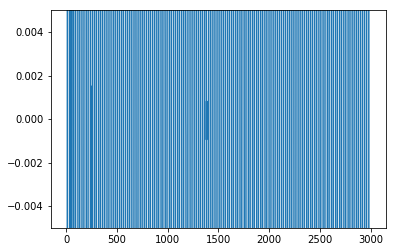

In [86]:
sum_data = np.sum(data[0:13], axis=0)
plt.plot(sum_data[3000:6000])
plt.ylim([-0.005, 0.005])

In [74]:
stim_id = 32

data = raw.get_data().T
events_range = np.arange(
    events_data.loc[stim_id]['time_begin'],
    events_data.loc[stim_id]['time_end'],
    events_data.loc[stim_id]['time_interval']
)


for t_start in events_range:
    t_start_index = raw.time_as_index(t_start)[0]
    data[t_start_index + 2 : t_start_index + 15, :] = 0
    
    
raw_without_artifact = mne.io.RawArray(data.T, raw.info)
raw_without_artifact.notch_filter(freqs=50, notch_widths=9)

NameError: name 'events_data' is not defined

In [132]:
events_range = np.arange(
    events_data.loc[stim_id]['time_begin'],
    events_data.loc[stim_id]['time_end'],
    events_data.loc[stim_id]['time_interval']
)

# for t_start in events_range:
# #     raw.plot(start=t_start, duration=events_data.loc[stim_id]['time_interval'], n_channels=15, scalings={'eeg': 0.0001})
#     raw_without_artifact.plot(start=t_start, duration=events_data.loc[stim_id]['time_interval'], order=[0, 4], n_channels=2, scalings={'eeg': 0.001})

# print("OK")

In [133]:
t_event_1_beg = events_data.loc[stim_id]['time_begin'] + events_data.loc[stim_id]['time_interval']
t_event_1_end = events_data.loc[stim_id]['time_end'] - events_data.loc[stim_id]['time_interval']
t_interval = events_data.loc[stim_id]['time_interval']

events = np.empty((0, 3), dtype=int)

for t_start in np.arange(t_event_1_beg, t_event_1_end, t_interval):
    events = np.vstack([
        events, 
        np.array([raw_without_artifact.time_as_index(t_start), 0, 1], dtype=int)
    ])

event_id = dict(stimulation=1)

t_min = 0
t_max = events_data.loc[stim_id]['time_interval']

epochs = mne.Epochs(raw_without_artifact, events, event_id, t_min, t_max, baseline=(events_data.loc[stim_id]['time_interval'] - 0.005, events_data.loc[stim_id]['time_interval']))

49 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 49 events and 206 original time points ...
0 bad epochs dropped
Loading data for 49 events and 206 original time points ...
Loading data for 20 events and 206 original time points ...


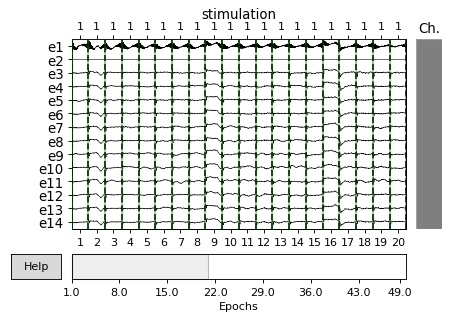

OK


In [134]:
epochs.get_data()
epochs.plot(n_channels=15, scalings={'eeg': 0.001})

print("OK")

In [135]:
subplot_ids = [1, 9, 17, 25, 2, 10, 18, 26, 40, 39, 38, 37, 36, 35]
closest_plots = {
    0: [0],
    1: [1, 2],
    2: [3],
    3: [5],
    4: [6],
    5: [7, 13],
    6: [4],
    7: [12],
    8: [11],
    9: [0],
    10: [],
    11: [],
    12: [0],
    13: [0],
    14: [1, 2],
    15: [1, 2],
    16: [3],
    17: [3],
    18: [5],
    19: [5],
    20: [5],
    21: [6],
    22: [6],
    23: [7, 13],
    24: [7, 13],
    25: [4],
    26: [4],
    27: [12],
    28: [12],
    29: [11],
    30: [11],
    31: [0],
    32: [0]
    
}
stim_labels = [
    's0_5Hz', 's1_5Hz', 's2_5Hz', 's3_5Hz', 's4_5Hz', 
    's5_5Hz', 's6_5Hz', 's7_5Hz', 's8_5Hz', 's9_5Hz', 
    's0_10Hz', 's1_10Hz', 
    's0_polar1_10Hz', 's0_polar2_10Hz', 
    's1_polar1_10Hz', 's1_polar2_10Hz', 
    's2_polar1_10Hz', 's2_polar2_10Hz', 
    's3_polar1a_10Hz', 's3_polar1b_10Hz', 's3_polar2_10Hz',
    's4_polar1_10Hz', 's4_polar2_10Hz', 
    's5_polar1_10Hz', 's5_polar2_10Hz', 
    's6_polar1_10Hz', 's6_polar2_10Hz', 
    's7_polar1_10Hz', 's7_polar2_10Hz', 
    's8_polar1_10Hz', 's8_polar2_10Hz', 
    's9_polar1_10Hz', 's9_polar2_10Hz'
]

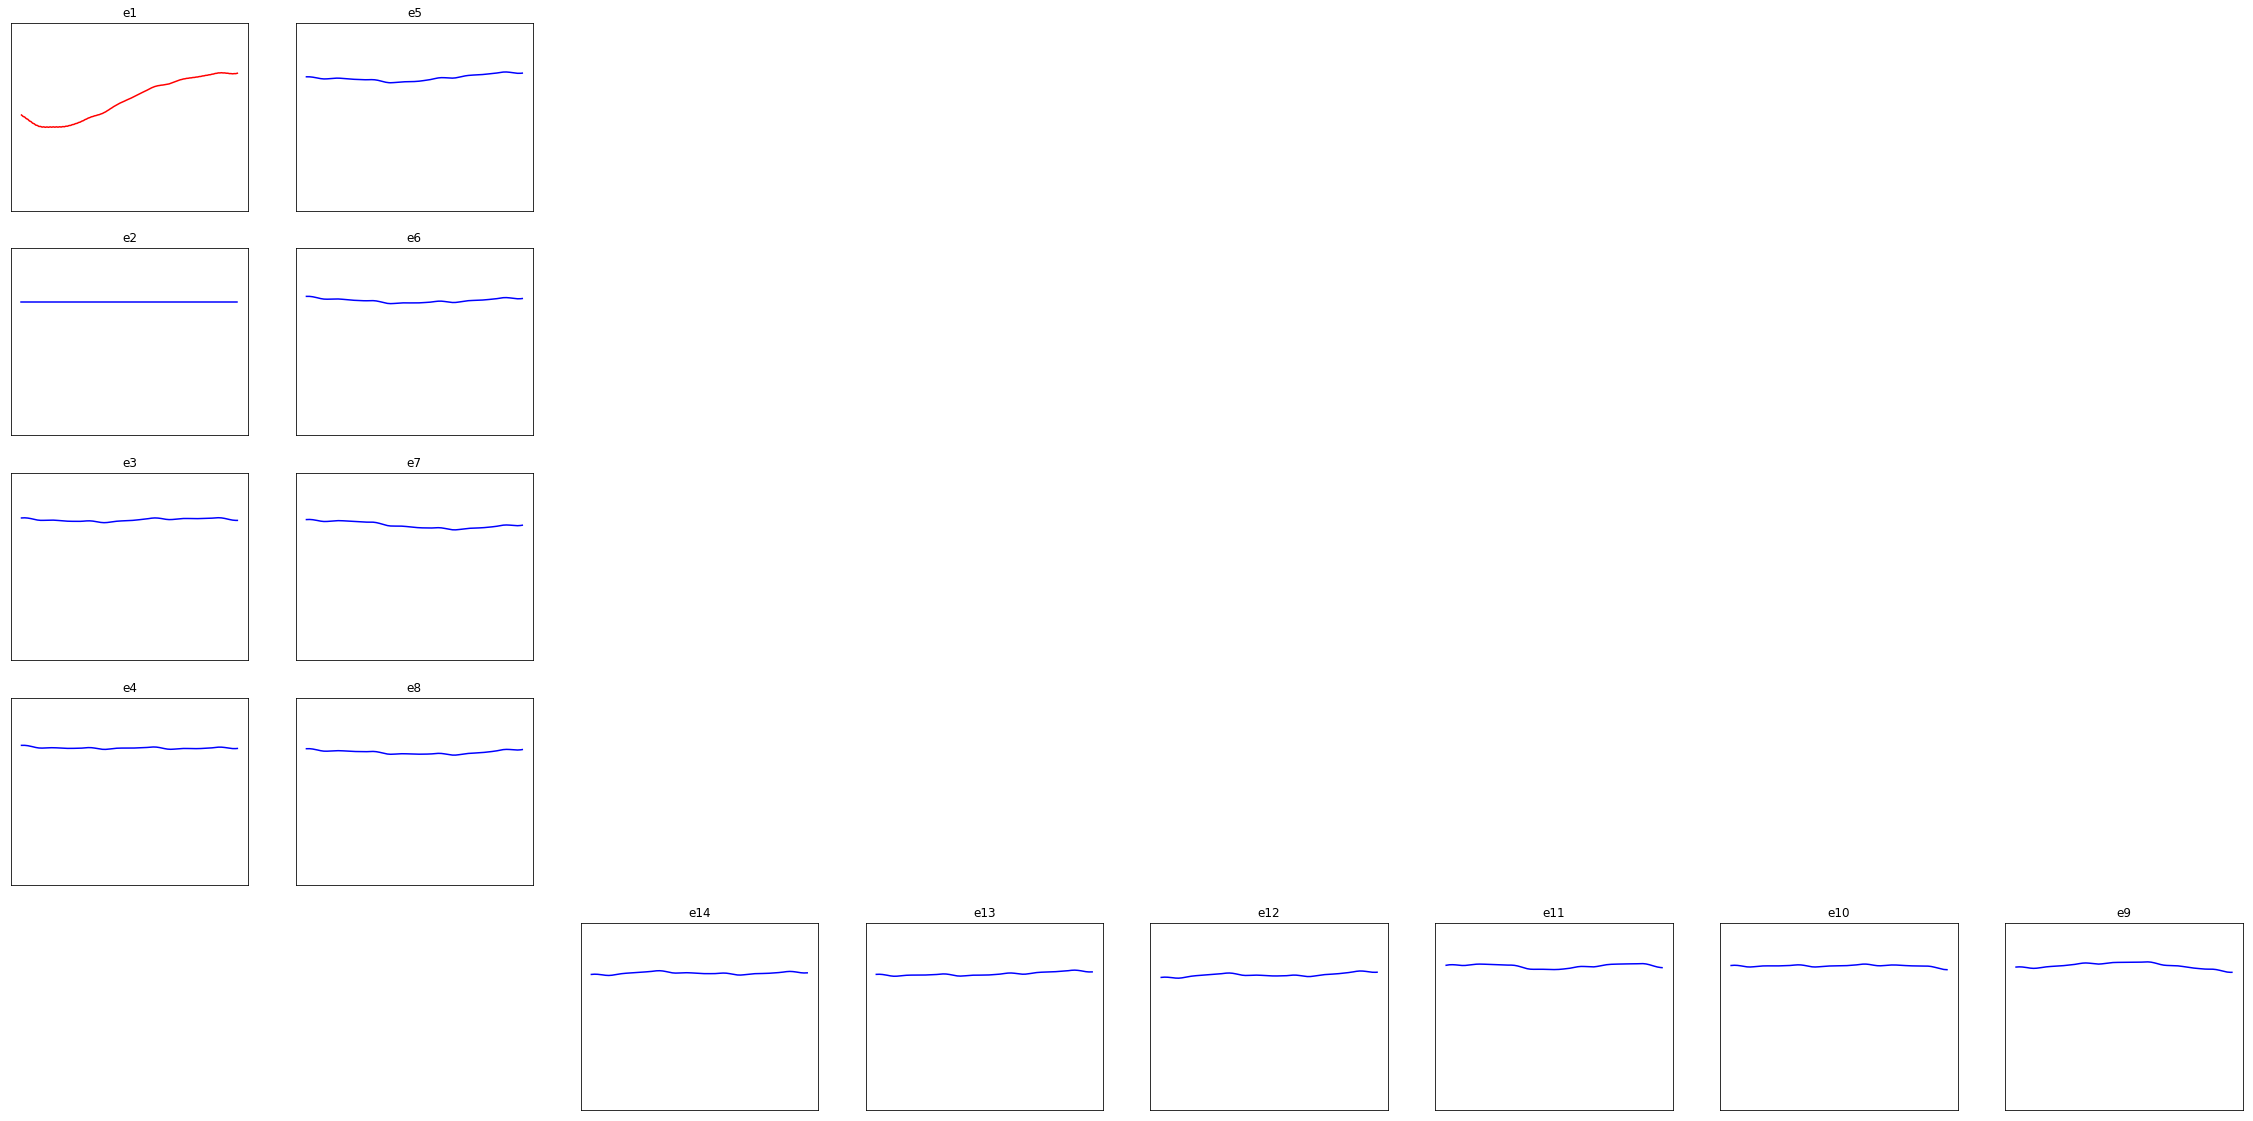

In [136]:
plt.figure(figsize=(40,20))

for i in range(14):
    avg_data = epochs.average(picks=[i]).crop(tmin=0.01).data[0]
    avg_channel_name = epochs.average(picks=[i]).crop(tmin=0.01).ch_names[0]
    
    plt.subplot(5, 8, subplot_ids[i])
    
    sma_lag = 50
    data = np.convolve(avg_data, np.ones((sma_lag,))/sma_lag, mode='valid')
    
    if stim_id in closest_plots.keys() and closest_plots[stim_id].count(i) > 0:
        plt.plot(data, 'r')
    else:
        plt.plot(data, 'b')
    
    plt.ylim([-0.0005, 0.0002])
    plt.xticks([])
    plt.yticks([])
    plt.title(avg_channel_name)
    
plt.savefig("stim_without_artifact_and_smoothed_%s.png" % stim_labels[stim_id])


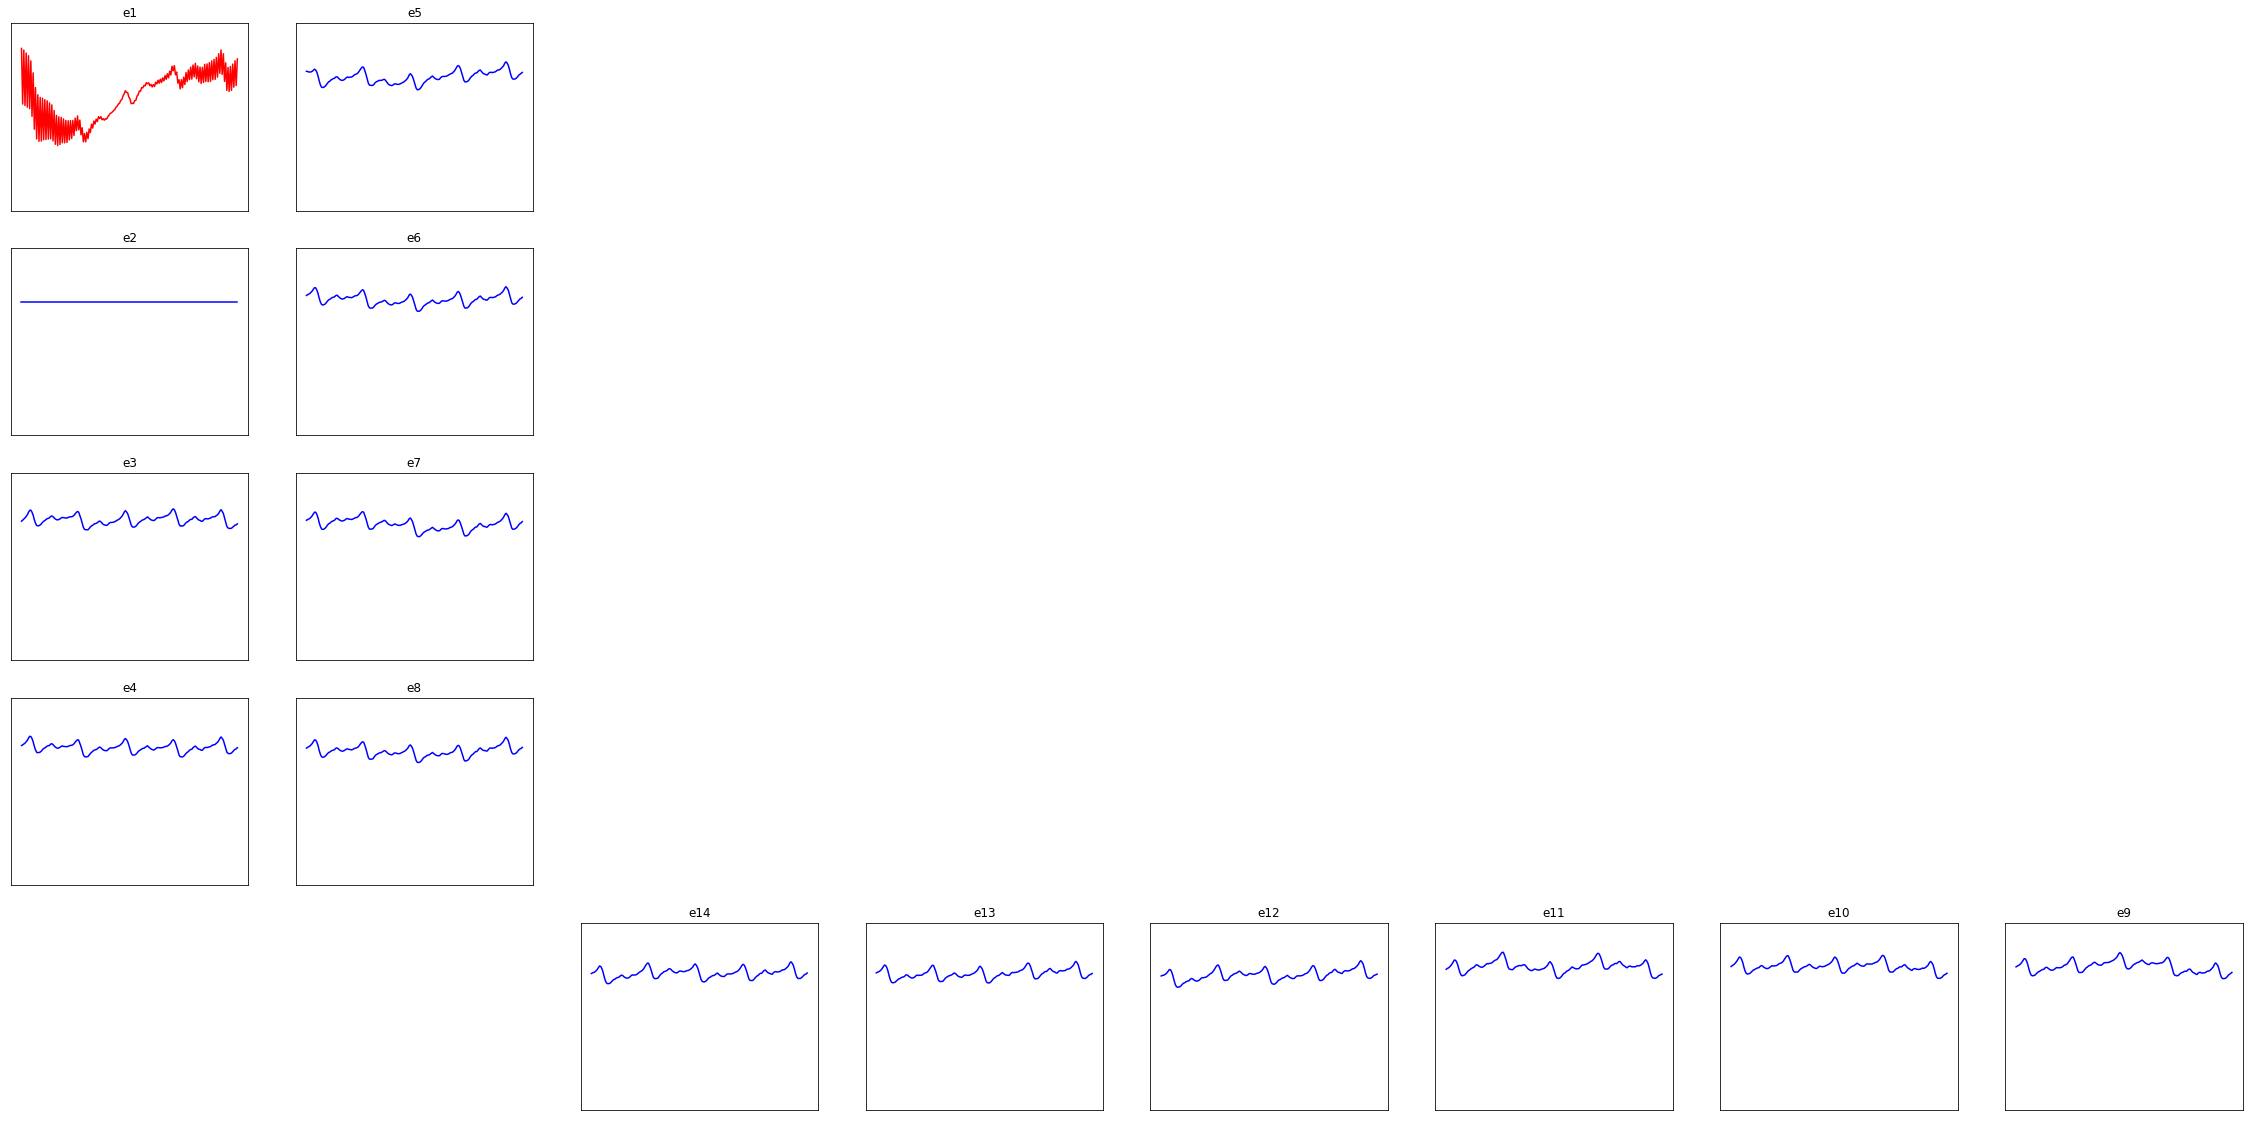

In [137]:
plt.figure(figsize=(40,20))

for i in range(14):
    avg_data = epochs.average(picks=[i]).crop(tmin=0.01).data[0]
    avg_channel_name = epochs.average(picks=[i]).crop(tmin=0.01).ch_names[0]
    
    plt.subplot(5, 8, subplot_ids[i])

    data = avg_data
    if stim_id in closest_plots.keys() and closest_plots[stim_id].count(i) > 0:
        plt.plot(data, 'r')
    else:
        plt.plot(data, 'b')
    
    plt.ylim([-0.0005, 0.0002])
    plt.xticks([])
    plt.yticks([])
    plt.title(avg_channel_name)
    
plt.savefig("stim_without_artifact_%s.png" % stim_labels[stim_id])
